In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
experiment = 'GA1'

# GA2
input_file = 'Multiple invasions GA1.xlsx'

df = pd.read_excel(input_file)

df

,Strain,Condition,Single,Double,Triple,Quadruple,Higher
0,NF54,Static,71.785844,18.939917,6.460351,2.029466,0.784422
1,KOP230P C3,Static,71.194657,18.838784,6.792996,2.143140,1.030422
2,KOP230P C5,Static,70.566220,19.170140,6.835278,2.290060,1.138301
3,KOPfs25 C1,Static,57.452280,24.853330,12.275753,4.451453,0.967184
4,KOPfs25 C3,Static,57.029418,24.616425,12.654049,4.791276,0.908832
5,KOEBA140 C3,Static,71.789034,19.108821,6.632219,1.926170,0.543755
6,KOEBA140 C4,Static,71.738205,19.001732,6.748036,2.034507,0.477521
7,KOEBA175 C6,Static,79.184261,16.047498,3.827955,0.756535,0.183752
8,KOEBA181 C1,Static,55.503183,24.626630,13.203005,5.083478,1.583704
9,KOEBA181 C2,Static,55.967871,24.586634,13.160169,4.958202,1.327125


      Strain    Single      Double     Triple  Quadruple    Higher   Speed
0       NF54  71.785844  18.939917   6.460351   2.029466  0.784422  Static
1    KOP230P  71.194657  18.838784   6.792996   2.143140  1.030422  Static
2    KOP230P  70.566220  19.170140   6.835278   2.290060  1.138301  Static
3    KOPfs25  57.452280  24.853330  12.275753   4.451453  0.967184  Static
4    KOPfs25  57.029418  24.616425  12.654049   4.791276  0.908832  Static
5   KOEBA140  71.789034  19.108821   6.632219   1.926170  0.543755  Static
6   KOEBA140  71.738205  19.001732   6.748036   2.034507  0.477521  Static
7   KOEBA175  79.184261  16.047498   3.827955   0.756535  0.183752  Static
8   KOEBA181  55.503183  24.626630  13.203005   5.083478  1.583704  Static
9   KOEBA181  55.967871  24.586634  13.160169   4.958202  1.327125  Static
10     KORh1  68.070282  20.028791   7.851214   2.702165  1.347548  Static
11    KORH2a  60.450986  23.223198  11.200748   4.183983  0.941086  Static
12    KORH2a  72.096769  

,Strain,Single,Double,Triple,Quadruple,Higher,Speed
0,NF54,71.785844,18.939917,6.460351,2.029466,0.784422,Static
1,KOP230P,71.194657,18.838784,6.792996,2.143140,1.030422,Static
2,KOP230P,70.566220,19.170140,6.835278,2.290060,1.138301,Static
3,KOPfs25,57.452280,24.853330,12.275753,4.451453,0.967184,Static
4,KOPfs25,57.029418,24.616425,12.654049,4.791276,0.908832,Static


<Figure size 3000x7200 with 0 Axes>

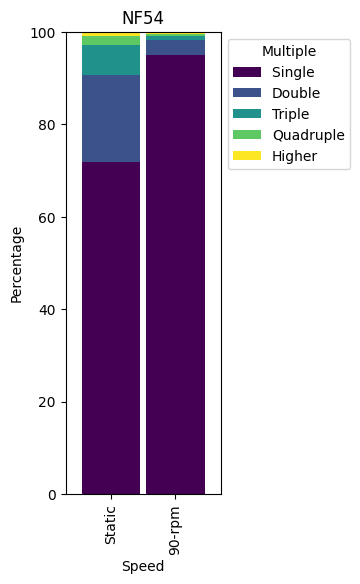

In [33]:
#This only works for GA3 
%matplotlib inline
# Create a custom order for the 'Multiple' column
stack_order = ['Single', 'Double', 'Triple', 'Quadruple', 'Higher']
speed_order = ['Static', '45-rpm', '90-rpm', '180-rpm']

def make_invasion_plot(df, label):
    plt.figure(figsize=(10, 24), dpi=300)

    # Create a pivot table to calculate the bottom positions for each 'Multiple' group
    pivot_df = df#.pivot_table(index='Speed', columns='Multiple', values='Percentage', fill_value=0)
    pivot_df.set_index('Speed', inplace=True)
    # Reorder the rows (strains) based on strain_order
    # present_line_order = [l for l in speed_order if l in df['Speed'].unique()]
    # print(pivot_df)
    # pivot_df = pivot_df.loc[present_line_order]
    # Create the stacked barplot using Seaborn
    ax = pivot_df.plot(kind='bar', stacked=True, cmap='viridis', width=0.9, figsize=(2,6))
    # sns.barplot(
    #     data=df,
    #     x='Speed',
    #     y='Percentage',
    #     hue='Multiple',
    #     stacked=True,
    # )
    # Customize the plot as needed
    # plt.xlabel('Strain')
    plt.ylabel('Percentage')
    plt.title(label)

    # Show the plot
    plt.legend(title='Multiple')
    sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))

    plt.ylim((0,100))
    plt.xticks(rotation=90)

    output_folder = f'Multiinvation {experiment}'
    if not os.path.exists(output_folder): os.makedirs(output_folder)
    
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(f'{output_folder}/{label}.svg', bbox_inches='tight')

condition_map = {
    'Static': 'Static',
    'Shaking': '90-rpm',
}

df_melted = df.copy()
df_melted['Line'] = df['Strain']
df_melted['Strain'] = df_melted['Line'].str.split(' ').str[0]
df_melted['Speed'] = df_melted['Condition'].str.strip().map(condition_map)
df_melted.drop(['Line', 'Condition'], axis=1, inplace=True)
print(df_melted)

for strain, dfg in df_melted.query('Strain == ["NF54"]').groupby('Strain'):
    make_invasion_plot(dfg, label=f'{strain}')
df_melted.head()

In [ ]:
#GA2 
%matplotlib inline
# Create a custom order for the 'Multiple' column
stack_order = ['Single', 'Double', 'Triple', 'Quadruple', 'Higher']
speed_order = ['Static', '45-rpm', '90-rpm', '180-rpm']
#Static
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1 ', 'KOPfs25 C3 ', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1 ', 'KORH2a C3 ', 'KORH4 C1']
#shaking
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1', 'KOPfs25 C3', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1', 'KORH2a C3 ', 'KORH4 C1']

# sns.set_theme(#context='notebook', 
#             #style='ticks', 
#             style='darkgrid', 
#             font='arial', 
#             # font_scale=3.5
#             ) 
#             #   color_codes=True, 
#             #   rc=None)

# sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

def make_invasion_plot(df, label):
    plt.figure(figsize=(10, 24), dpi=300)

    # Create a pivot table to calculate the bottom positions for each 'Multiple' group
    pivot_df = df.pivot_table(index='Plate', columns='Multiple', values='Percentage', fill_value=0)
    pivot_df = pivot_df[stack_order]  # Reorder the columns based on stack_order

    # Reorder the rows (strains) based on strain_order
    present_line_order = [l for l in plate_order if l in df['Plate'].unique()]
    pivot_df = pivot_df.loc[present_line_order]

    # Create the stacked barplot using Seaborn
    ax = pivot_df.plot(kind='bar', stacked=True, cmap='viridis', width=0.9, figsize=(2,6))
    # sns.barplot(
    #     data=df,
    #     x='Speed',
    #     y='Percentage',
    #     hue='Multiple',
    #     stacked=True,
    # )
    # Customize the plot as needed
    # plt.xlabel('Strain')
    plt.ylabel('Percentage')
    plt.title(label)

    # Show the plot
    plt.legend(title='Multiple')
    sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))

    plt.ylim((0,100))
    plt.xticks(rotation=90)

    output_folder = f'Multiinvation {experiment}'
    if not os.path.exists(output_folder): os.makedirs(output_folder)
    
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(f'{output_folder}/{label}.svg', bbox_inches='tight')

df_melted['Strain'] = df_melted['Line'].str.split(' ').str[0]
for (strain, speed), dfg in df_melted.groupby(['Strain', 'Speed']):
    make_invasion_plot(dfg, label=f'{strain}, {speed}')
df_melted.head()

KeyError: 'Plate'

<Figure size 3000x7200 with 0 Axes>

['Single' 'Double' 'Triple' 'Quadruple' 'Higher' 'Lates']


c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

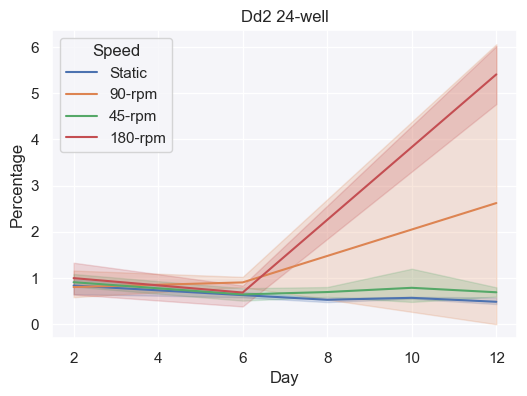

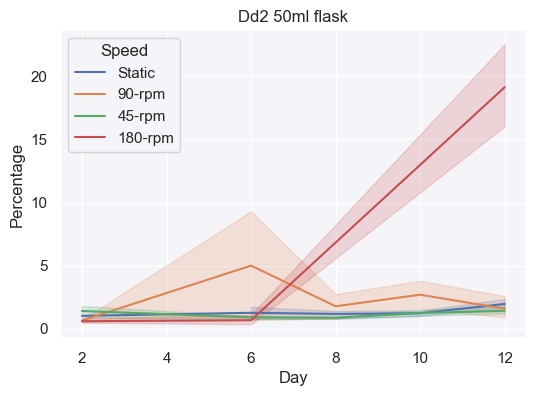

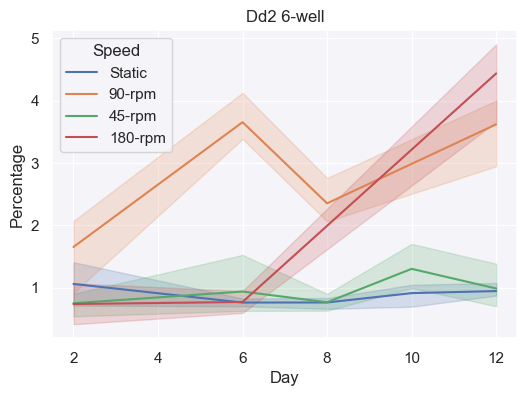

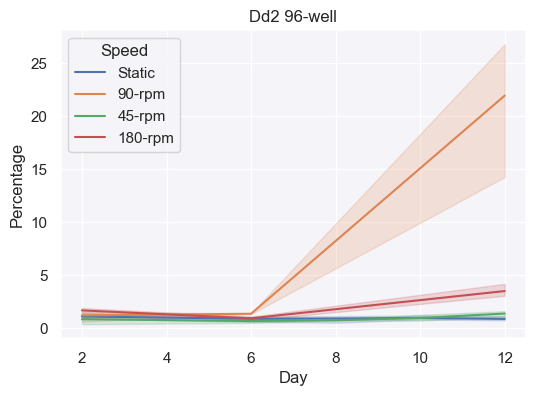

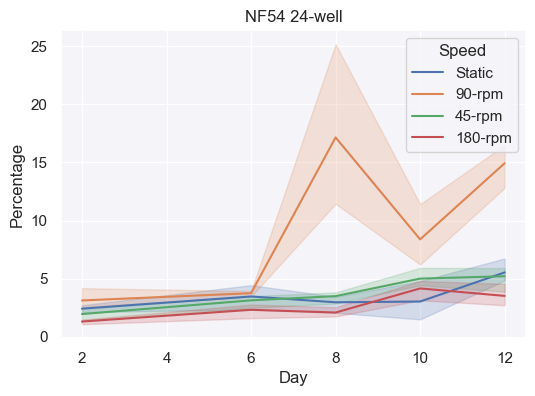

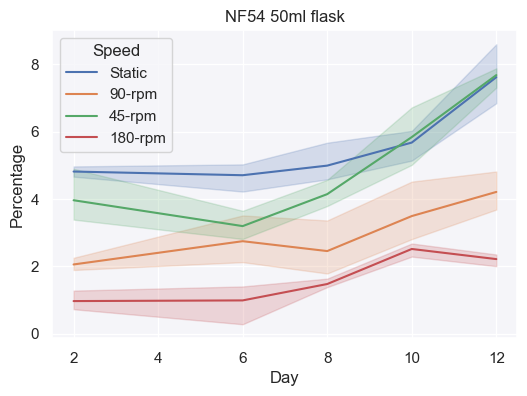

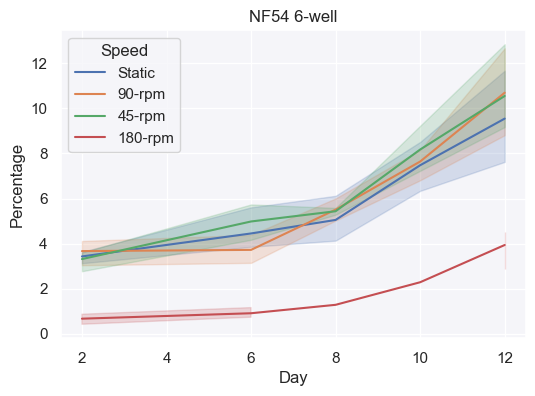

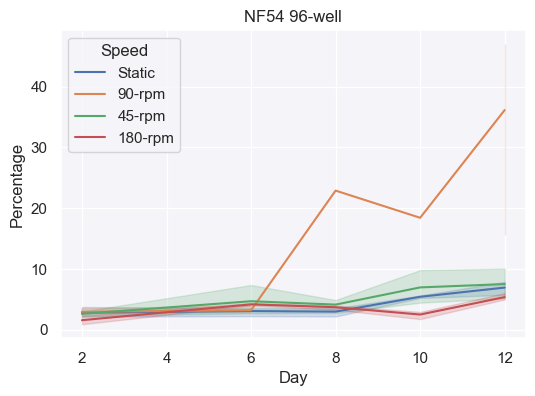

In [ ]:
def plot_lates_per_day(df, label):
    plt.figure(figsize=(6,4), dpi=100)
    sns.lineplot(
        data=df,
        x='Day',
        y='Percentage',
        hue='Speed',
    )
    plt.title(label)

print(df_melted_per_day['Multiple'].unique())

for line, dfg in df_melted_per_day.query('Multiple == "Lates"').groupby('Line'):
    plot_lates_per_day(dfg, line)